In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn import metrics

In [5]:
data=pd.read_csv('wine quality.csv')
data.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [7]:
data['type'].value_counts()

type
white    4898
red      1599
Name: count, dtype: int64

In [8]:
data['quality'].value_counts()

quality
6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: count, dtype: int64

In [10]:
data.duplicated().sum()

1168

In [11]:
data=data.drop_duplicates()

In [12]:
data.isnull().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [13]:
data.shape

(5329, 13)

In [14]:
data.select_dtypes(include=['number','object'] ).columns

Index(['type', 'fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality'],
      dtype='object')

In [15]:
data['type']=data['type'].map({'white':0,'red':1})
from sklearn.impute import KNNImputer
imputer=KNNImputer()

In [17]:
for i in data.select_dtypes(include='number').columns:
    data[i]=imputer.fit_transform(data[[i]])

In [29]:
data.isnull().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

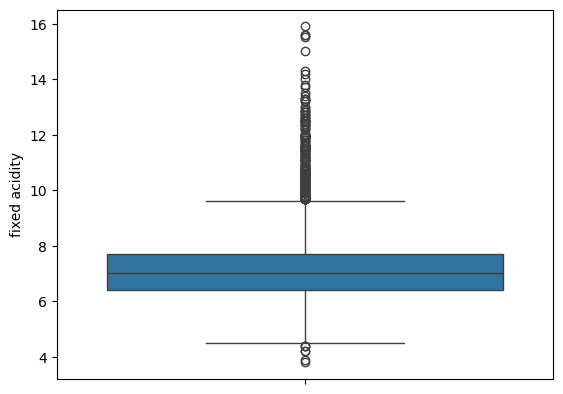

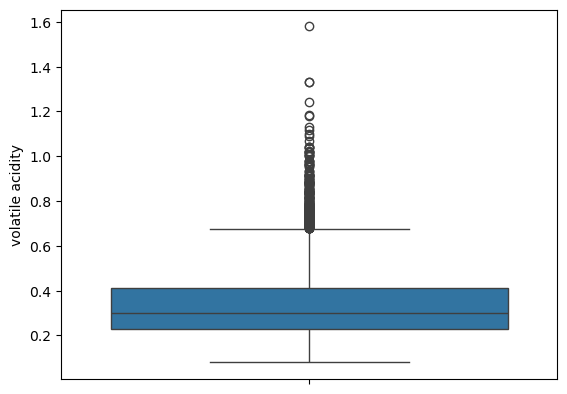

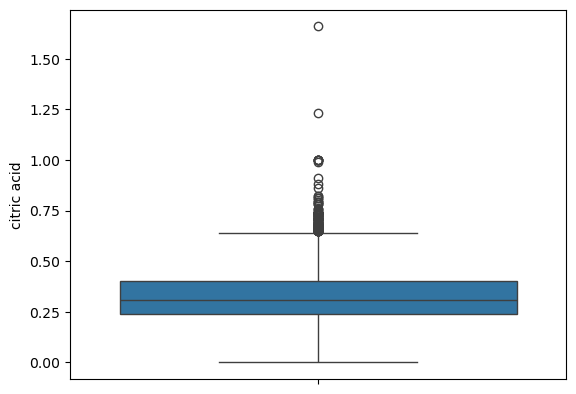

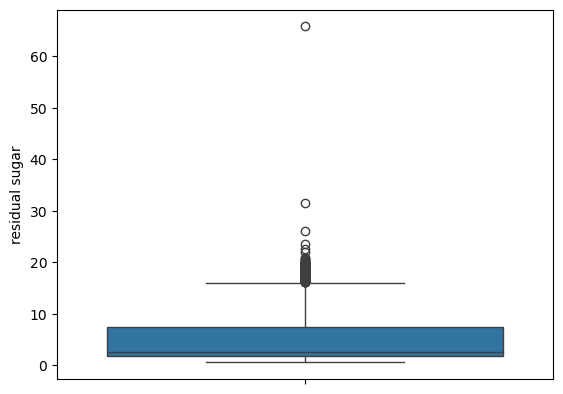

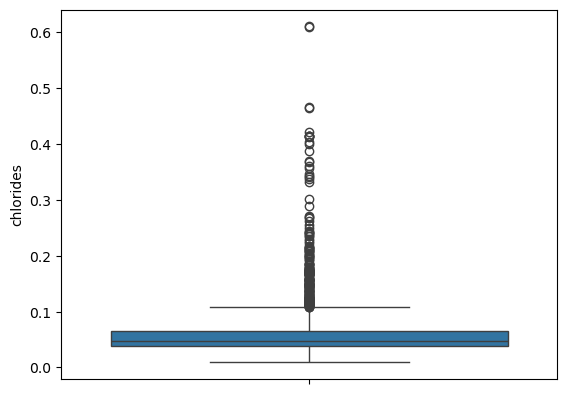

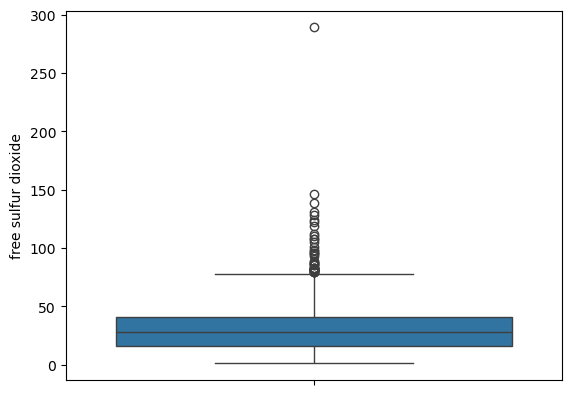

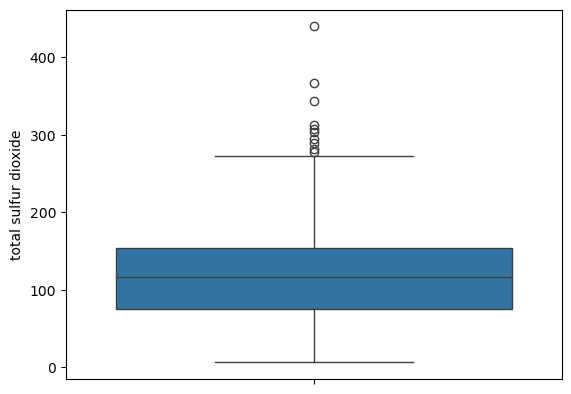

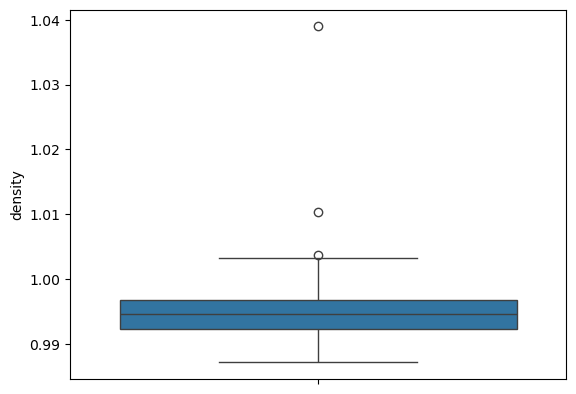

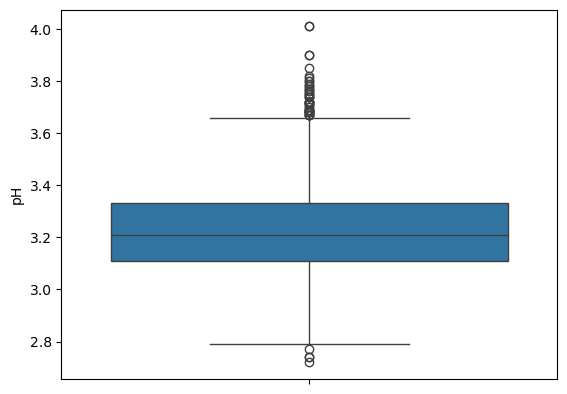

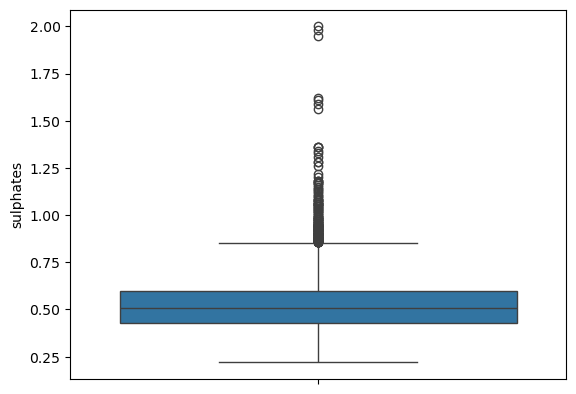

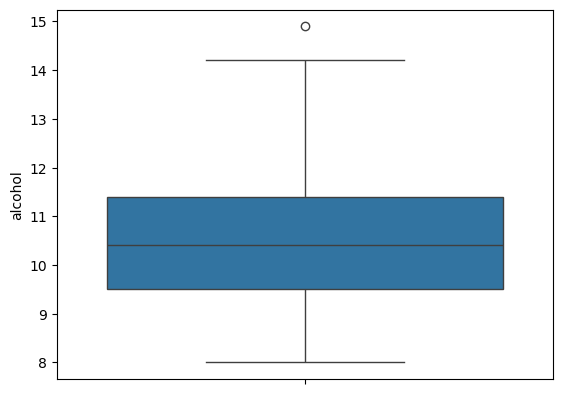

In [31]:
for i in data.select_dtypes(include='number').columns:
    if i=='quality' or i=='type':
        continue
    sns.boxplot(data=data[i])
    plt.show()

In [32]:
def treatment(i):
    q1,q3=np.percentile(i,[25,75])
    iqr=q3-q1
    upper=q3+(1.5*iqr)
    lower=q1-(1.5*iqr)
    return lower,upper

In [33]:
for i in ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']:
    lower,upper=treatment(data[i])
    data[i]=np.where(lower>data[i],lower,data[i])
    data[i]=np.where(upper<data[i],upper,data[i])

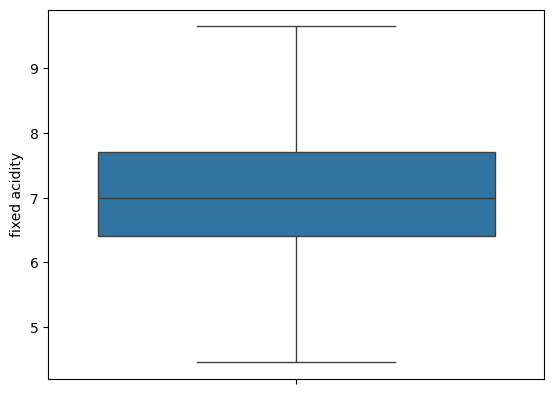

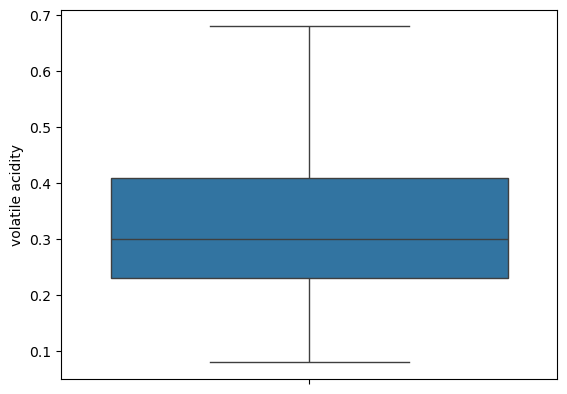

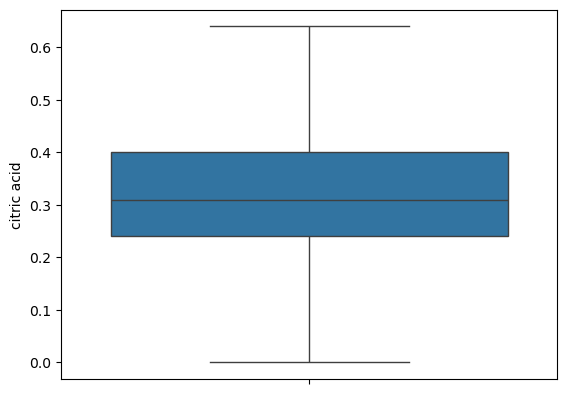

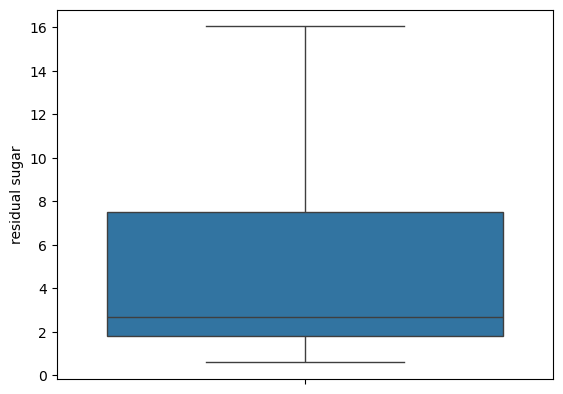

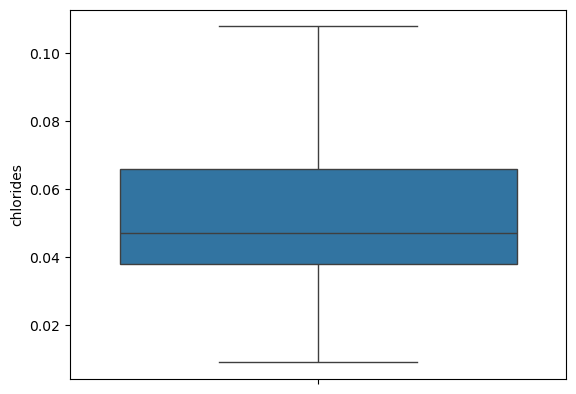

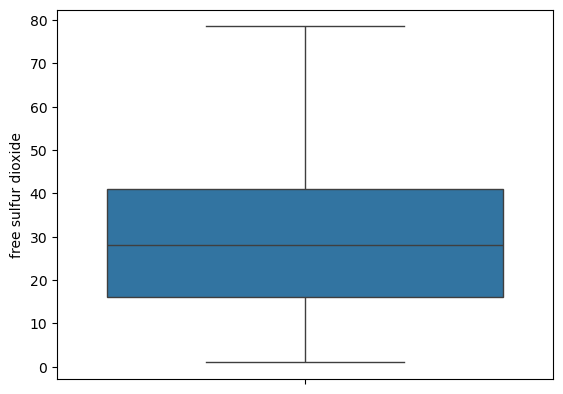

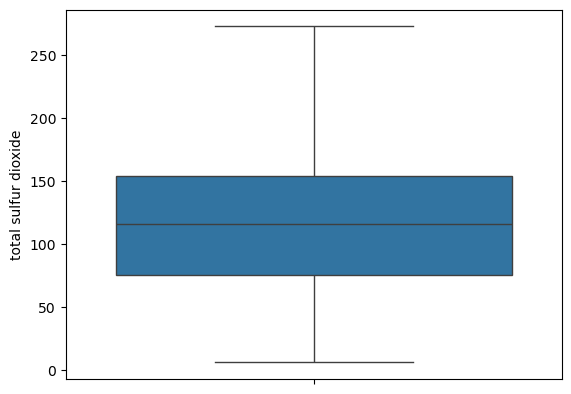

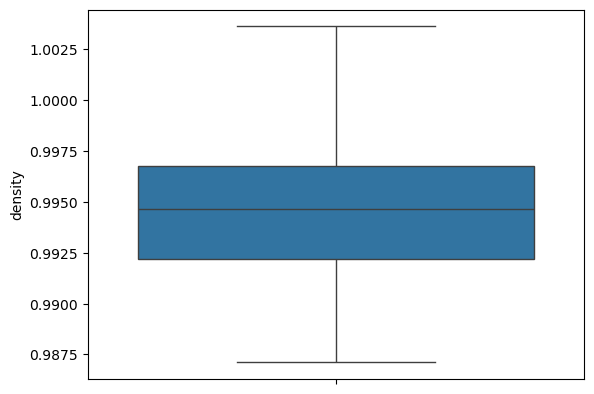

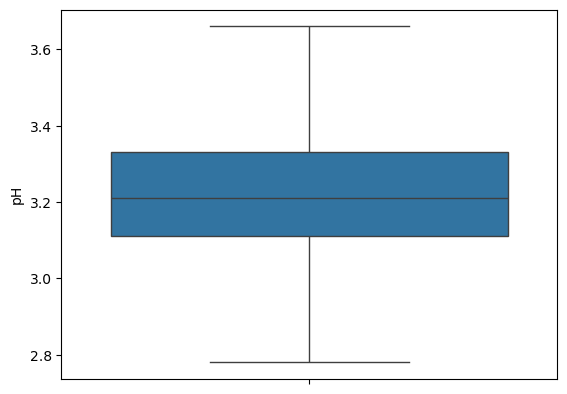

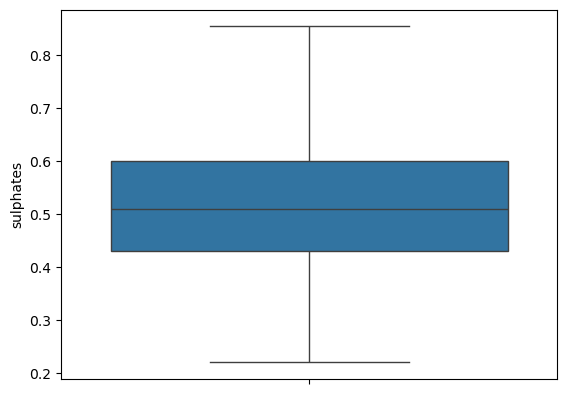

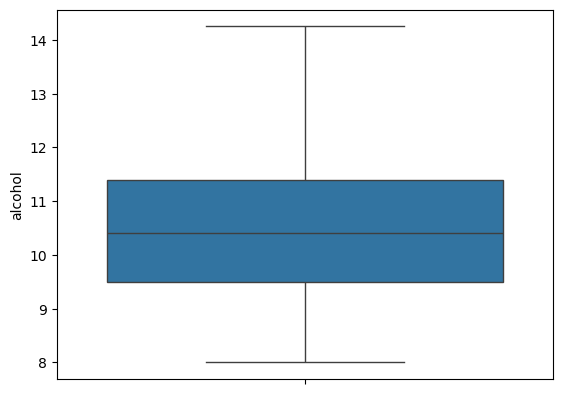

In [37]:
for i in data.select_dtypes(include='number').columns:
    if i=='quality' or i=='type':
        continue
    sns.boxplot(data=data[i])
    plt.show()

The Outliers are filtered

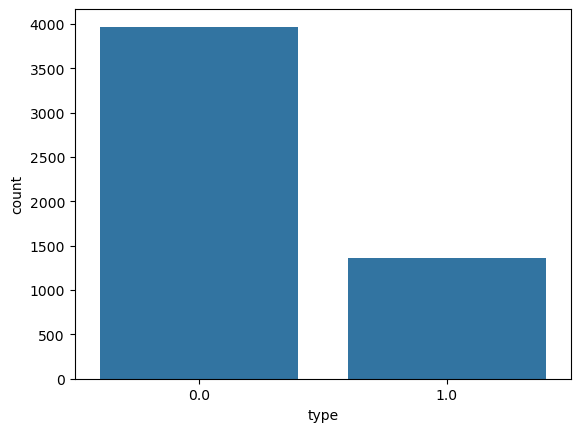

In [40]:
sns.countplot(x='type', data=data)
plt.show()

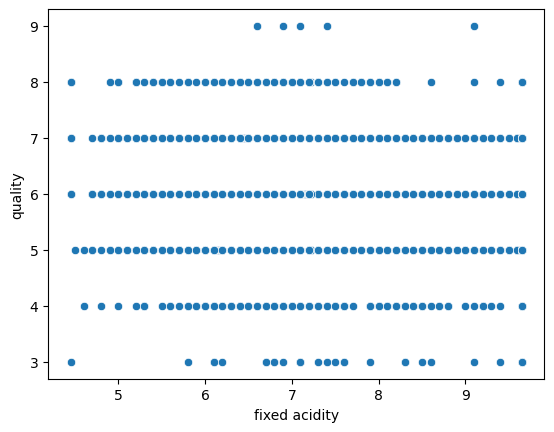

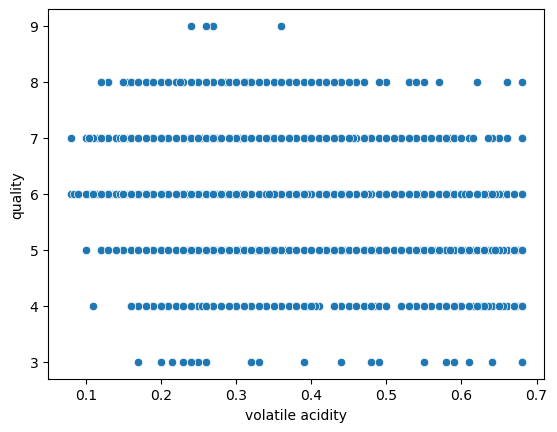

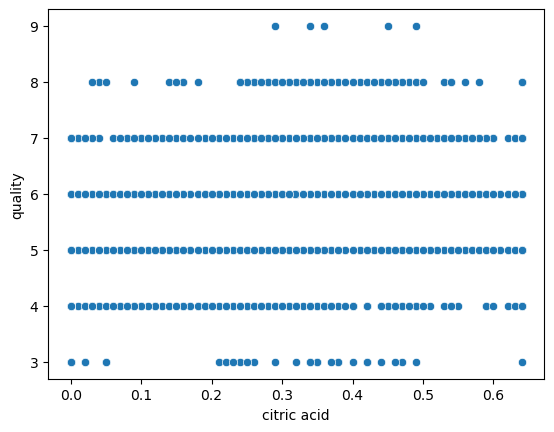

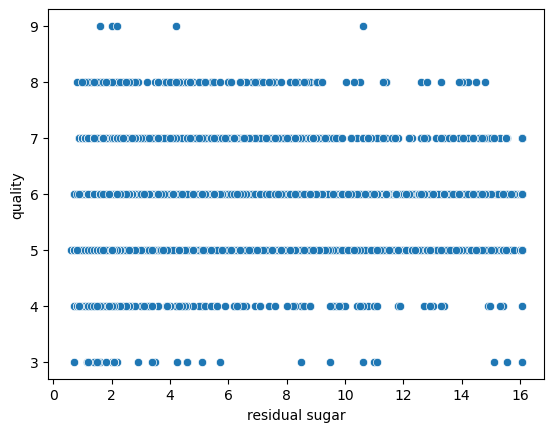

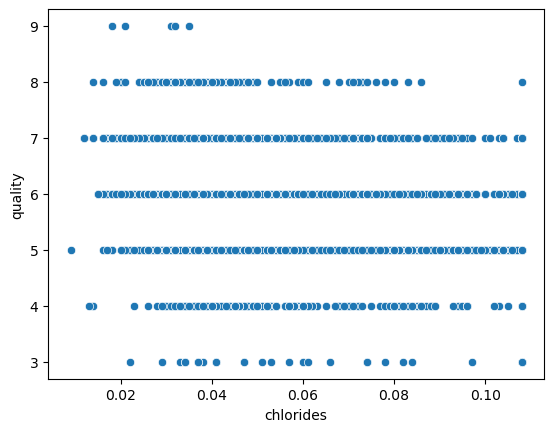

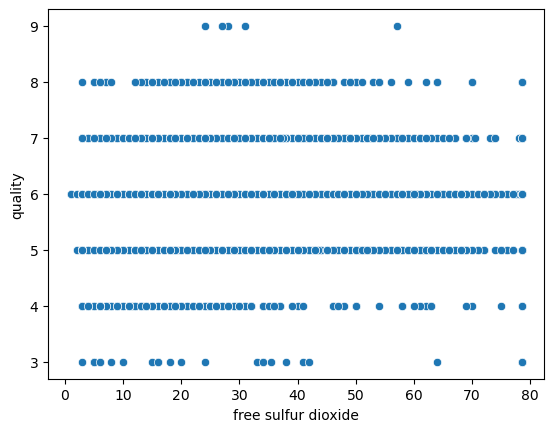

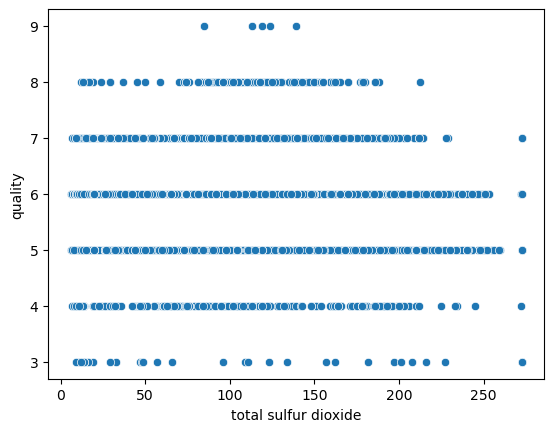

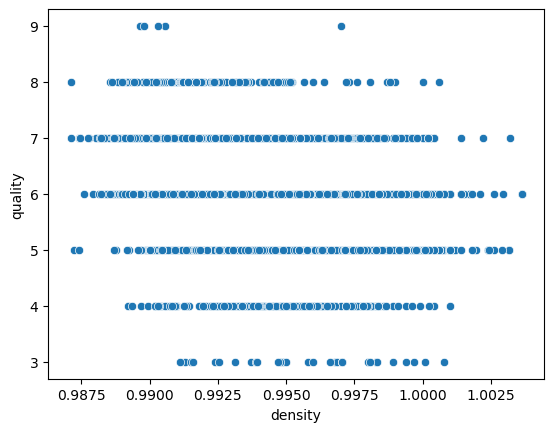

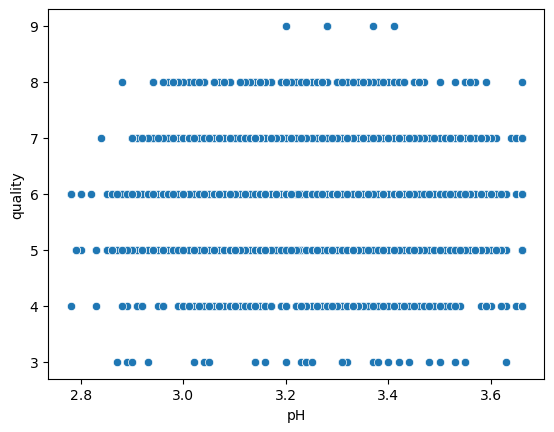

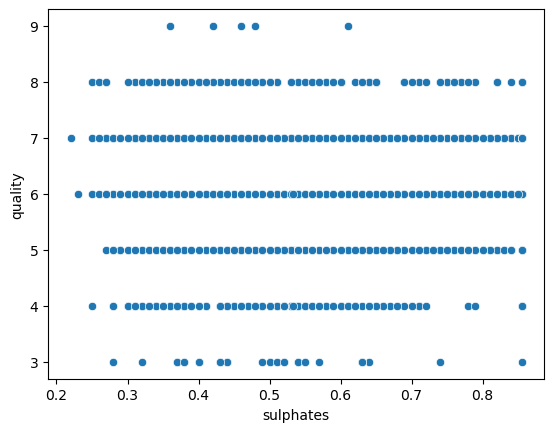

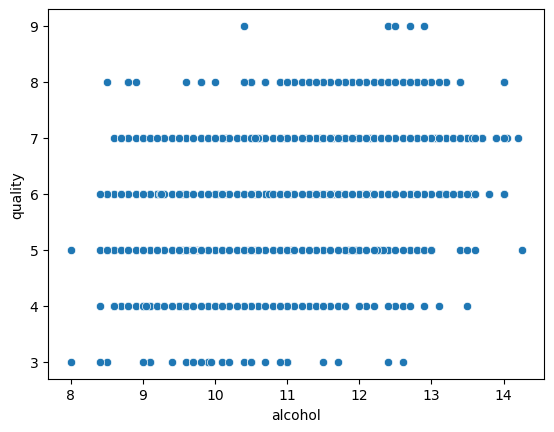

In [42]:
for i in ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']:
    sns.scatterplot(x=i, y='quality', data=data)
    plt.show()

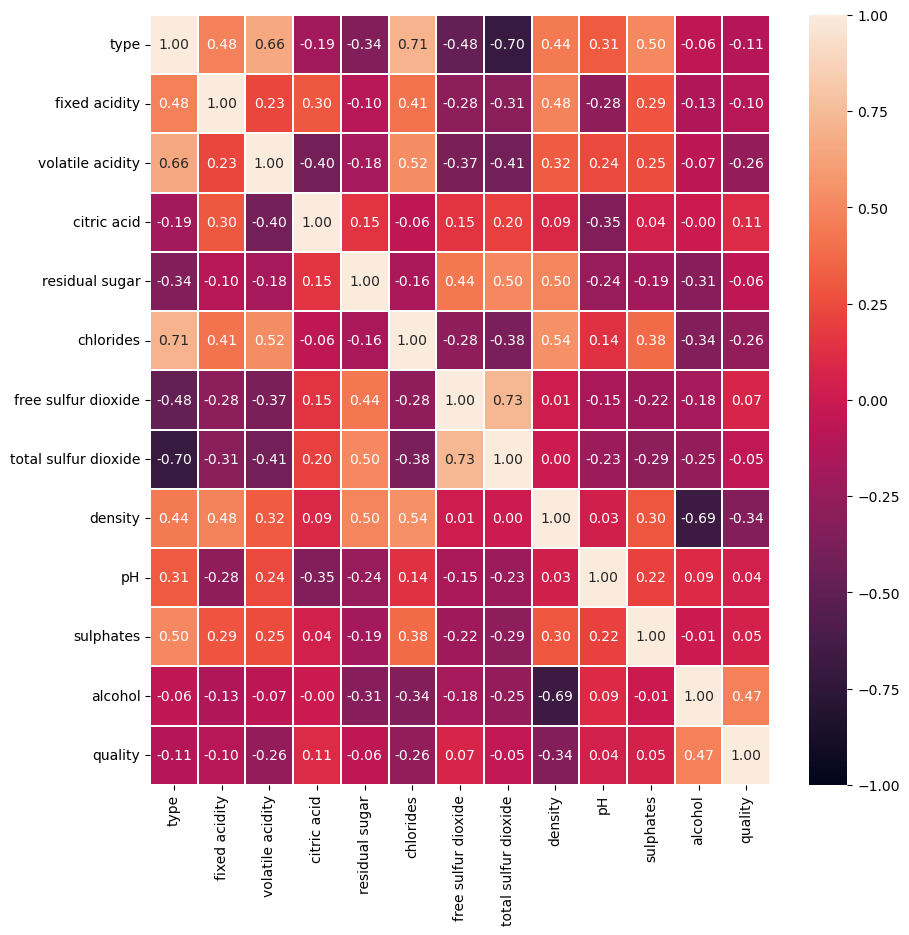

In [48]:
correlation_matrix = data.corr()
plt.figure(figsize=[10,10])
sns.heatmap(correlation_matrix, annot=True,linewidth=0.1,fmt=".2f",vmin=-1)
plt.show()

In [50]:
x=data.drop(columns='quality',axis=1)
y=data['quality']
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=scaler.fit_transform(x)

In [52]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [73]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)


In [56]:
model=LinearRegression()
model.fit(x_train,y_train)
test_prediction=model.predict(x_test)
r2_test_error=metrics.r2_score(y_test,test_prediction)


In [59]:
model2=RandomForestClassifier(random_state=50)
model2.fit(x_train,y_train)
test_prediction=model2.predict(x_test)
test_accuracy=metrics.accuracy_score(y_test,test_prediction)

In [62]:
model3=DecisionTreeClassifier(random_state=42)
model3.fit(x_train,y_train)
test2_prediction=model3.predict(x_test)
test2_accuracy=metrics.accuracy_score(y_test,test2_prediction)

In [64]:
model4=XGBClassifier(random_state=42)
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)
model4.fit(x_train,y_train_encoded)
test3_prediction=model4.predict(x_test)
test3_accuracy=metrics.accuracy_score(y_test_encoded,test3_prediction)

In [65]:
print(f"Linear Regression Accuracy: {r2_test_error*100}")
print(f"Random Forest Accuracy: {test_accuracy*100}")
print(f"Decision Tree Accuracy: {test2_accuracy*100}")
print(f"XGBoost Classifier Accuracy: {test3_accuracy*100}")

Linear Regression Accuracy: 29.512250870097432
Random Forest Accuracy: 55.909943714821765
Decision Tree Accuracy: 45.40337711069418
XGBoost Classifier Accuracy: 54.690431519699814


Hence The Random Forest Classifier is the best in all the other algorithms